In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
biostats = pd.read_csv('output/biostats.csv')
advanced = pd.read_csv('output/advanced.csv')
per_mins = pd.read_csv('output/per_minute.csv')
per_poss = pd.read_csv('output/per_poss.csv')

biostats['player_link']=biostats['player_link'].astype(str)
advanced['player_link']=advanced['player_link'].astype(str)
per_mins['player_link']=per_mins['player_link'].astype(str)
per_poss['player_link']=per_poss['player_link'].astype(str)

df = biostats.set_index('player_link').join(advanced.set_index('player_link'), rsuffix='irrelevant')\
.join(per_mins.set_index('player_link'), rsuffix='irrelevantt')\
.join(per_poss.set_index('player_link'), rsuffix='_irrelevant')

df = df[list(filter(lambda x: 'Unnamed' not in x and 'irrelevant' not in x, df.columns))]

df = df.loc[(df['mp_per_g'] > 20) & (df['g'] > 15)]
df['row'] = [i for i in range(len(df))]
df['pos_simple'] = [a[-1] for a in df['pos']]

df = df.set_index('row')
print(df.columns.values)
df

['ranker' 'player' 'pos' 'age' 'team_id' 'g' 'gs' 'mp_per_g' 'fg_per_g'
 'fga_per_g' 'fg_pct' 'fg3_per_g' 'fg3a_per_g' 'fg3_pct' 'fg2_per_g'
 'fg2a_per_g' 'fg2_pct' 'efg_pct' 'ft_per_g' 'fta_per_g' 'ft_pct'
 'orb_per_g' 'drb_per_g' 'trb_per_g' 'ast_per_g' 'stl_per_g' 'blk_per_g'
 'tov_per_g' 'pf_per_g' 'pts_per_g' 'team_id_link' 'height' 'weight' 'bmi'
 'mp' 'per' 'ts_pct' 'fg3a_per_fga_pct' 'fta_per_fga_pct' 'orb_pct'
 'drb_pct' 'trb_pct' 'ast_pct' 'stl_pct' 'blk_pct' 'tov_pct' 'usg_pct'
 'ws-dum' 'ows' 'dws' 'ws' 'ws_per_48' 'bpm-dum' 'obpm' 'dbpm' 'bpm'
 'vorp' 'fg_per_mp' 'fga_per_mp' 'fg3_per_mp' 'fg3a_per_mp' 'fg2_per_mp'
 'fg2a_per_mp' 'ft_per_mp' 'fta_per_mp' 'orb_per_mp' 'drb_per_mp'
 'trb_per_mp' 'ast_per_mp' 'stl_per_mp' 'blk_per_mp' 'tov_per_mp'
 'pf_per_mp' 'pts_per_mp' 'fg_per_poss' 'fga_per_poss' 'fg3_per_poss'
 'fg3a_per_poss' 'fg2_per_poss' 'fg2a_per_poss' 'ft_per_poss'
 'fta_per_poss' 'orb_per_poss' 'drb_per_poss' 'trb_per_poss'
 'ast_per_poss' 'stl_per_poss' 'blk_per

,ranker,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,trb_per_poss,ast_per_poss,stl_per_poss,blk_per_poss,tov_per_poss,pf_per_poss,pts_per_poss,off_rtg,def_rtg,pos_simple
row,,,,,,,,,,,,,,,,,,,,,
0,1,Steven Adams,C,26,OKC,29,29,27.8,5.0,8.1,...,17.0,4.8,1.1,2.2,2.7,3.3,20.4,123.0,105,C
1,2,Bam Adebayo,C,22,MIA,32,32,34.3,5.8,10.3,...,14.9,6.5,2.0,1.8,3.9,3.7,22.1,117.0,102,C
2,3,LaMarcus Aldridge,C,34,SAS,29,29,32.9,7.9,15.4,...,10.8,3.5,0.9,2.7,2.1,3.3,28.1,116.0,110,C
3,6,Jarrett Allen,C,21,BRK,31,28,26.5,4.7,7.2,...,18.3,2.3,1.3,2.5,2.1,4.3,21.5,133.0,103,C
4,8,Al-Farouq Aminu,PF,29,ORL,18,2,21.1,1.4,4.8,...,11.2,2.7,2.3,1.0,2.2,3.5,10.0,88.0,106,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,462,Marvin Williams,PF,33,CHO,30,0,20.8,2.6,5.5,...,6.6,2.5,1.7,1.1,1.7,4.4,18.0,119.0,113,F
265,468,Delon Wright,SG,27,DAL,30,2,20.5,2.9,5.9,...,8.4,7.8,3.6,0.7,1.7,2.7,18.5,130.0,105,G
266,469,Thaddeus Young,PF,31,CHI,32,0,21.8,3.5,8.8,...,9.8,4.0,2.3,0.5,3.4,4.1,19.2,94.0,105,F


In [3]:
pd.set_option('display.max_rows', None)
df.sort_values('usg_pct')[::-1][['player', 'pos', 'usg_pct', 'pts_per_mp', 'ast_per_mp', 'trb_per_mp', 'mp_per_g']].loc[df['pos_simple'] == 'G']

,player,pos,usg_pct,pts_per_mp,ast_per_mp,trb_per_mp,mp_per_g
row,,,,,,,
136,James Harden,SG,37.7,36.6,7.2,5.6,37.7
107,Luka Dončić,PG,36.9,32.3,10.1,10.6,32.0
267,Trae Young,PG,34.5,29.4,8.6,4.4,34.9
257,Russell Westbrook,PG,32.9,24.6,7.2,8.3,35.3
228,D'Angelo Russell,SG,32.2,26.6,6.9,3.9,31.4
17,Bradley Beal,SG,32.0,27.4,6.6,4.7,36.6
189,Donovan Mitchell,SG,31.5,25.9,4.4,4.7,35.1
105,Spencer Dinwiddie,SG,31.5,26.5,7.3,3.5,30.7
161,LeBron James,PG,31.5,25.9,11.2,7.7,35.0


Text(0, 0.5, 'Assists per 36 min.')

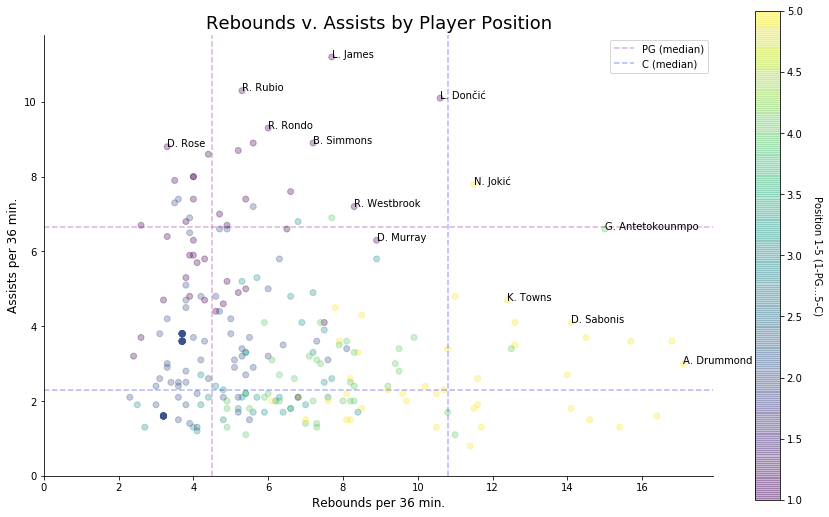

In [4]:
labels = {'PG': 1, 'SG': 2, 'SF': 3, 'PF': 4, 'C': 5, 'G': 1.5, 'F': 3.5}

y = 'ast_per_mp'
x = 'trb_per_mp'

l = [labels[i] for i in df['pos']]
colors=['purple', 'blue', 'teal', 'green', 'orange', 'pink', 'red', 'yellow']

for i, pos in enumerate(['PG', 'C']):
    plt.axvline(df.loc[df['pos'] == pos][x].median(), linestyle='--', label=pos + ' (median)', c=colors[i], alpha=.3)
    plt.axhline(df.loc[df['pos'] == pos][y].median(), linestyle='--', c=colors[i], alpha=.3)

plt.scatter(df[x], df[y], c=l, cmap='viridis', alpha=.3)
plt.colorbar().ax.set_ylabel('Position 1-5 (1-PG...5-C)', rotation=270, labelpad=20)

highlight = {'LeBron James', 'Giannis Antetokounmpo', 'Nikola Jokić', 'Luka Dončić', 'Andre Drummond',
            'Domantas Sabonis', 'Russell Westbrook', 'Dejounte Murray', 'Karl-Anthony Towns',
            'Ben Simmons', 'Ricky Rubio', 'Derrick Rose', 'Rajon Rondo'}

for i, txt in enumerate(df['player']):
    if df['player'][i] in highlight:
        plt.annotate(txt[0] + '. ' + txt.split(' ')[-1], (df[x][i], df[y][i]))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gcf().set_size_inches(15, 9)

plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.gca().set_aspect('equal', adjustable='box')

plt.legend()
plt.title('Rebounds v. Assists by Player Position', fontsize=18)
plt.xlabel('Rebounds per 36 min.', fontsize=12)
plt.ylabel('Assists per 36 min.', fontsize=12)

In [5]:
labels = {'PG': 1, 'SG': 2, 'SF': 3, 'PF': 4, 'C': 5, 'G': 1.5, 'F': 3.5}

y = df['']
x = 'trb_per_mp'

l = [labels[i] for i in df['pos']]
colors=['purple', 'blue', 'teal', 'green', 'orange', 'pink', 'red', 'yellow']

for i, pos in enumerate(['PG', 'C']):
    plt.axvline(df.loc[df['pos'] == pos][x].median(), linestyle='--', label=pos + ' (median)', c=colors[i], alpha=.3)
    plt.axhline(df.loc[df['pos'] == pos][y].median(), linestyle='--', c=colors[i], alpha=.3)
#     plt.plot(np.unique(df.loc[df['pos'] == pos][x]), np.poly1d(np.polyfit(df.loc[df['pos'] == pos][x], df.loc[df['pos'] == pos][y], 1))(np.unique(df.loc[df['pos'] == pos][x])))

plt.scatter(df[x], df[y], c=l, cmap='viridis', alpha=.3)
plt.colorbar().ax.set_ylabel('Position 1-5 (1-PG...5-C)', rotation=270, labelpad=20)

highlight = {'LeBron James', 'Giannis Antetokounmpo', 'Nikola Jokić', 'Luka Dončić', 'Andre Drummond',
            'Domantas Sabonis', 'Russell Westbrook', 'Dejounte Murray', 'Karl-Anthony Towns',
            'Ben Simmons', 'Ricky Rubio', 'Derrick Rose', 'Rajon Rondo'}

for i, txt in enumerate(df['player']):
    if df['player'][i] in highlight:
        plt.annotate(txt[0] + '. ' + txt.split(' ')[-1], (df[x][i], df[y][i]))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gcf().set_size_inches(15, 9)

plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.gca().set_aspect('equal', adjustable='box')

plt.legend()
plt.title('Rebounds v. Assists by Player Position', fontsize=18)
plt.xlabel('Rebounds per 36 min.', fontsize=12)
plt.ylabel('Assists per 36 min.', fontsize=12)

KeyError: ''

In [ ]:
labels = {'PG': 1, 'SG': 2, 'SF': 3, 'PF': 4, 'C': 5, 'G': 1.5, 'F': 3.5}

def plot(df, x, y, highlight, title, xtitle, ytitle):
    df = df.reset_index()
    l = [labels[i] for i in df['pos']]
    colors=['purple', 'blue', 'teal', 'green', 'orange', 'pink', 'red', 'yellow']

    for i, pos in enumerate(['PG', 'C']):
        plt.axvline(df.loc[df['pos'] == pos][x].median(), linestyle='--', label=pos + ' (median)', c=colors[i], alpha=.3)
        plt.axhline(df.loc[df['pos'] == pos][y].median(), linestyle='--', c=colors[i], alpha=.3)
    #     plt.plot(np.unique(df.loc[df['pos'] == pos][x]), np.poly1d(np.polyfit(df.loc[df['pos'] == pos][x], df.loc[df['pos'] == pos][y], 1))(np.unique(df.loc[df['pos'] == pos][x])))

    plt.scatter(df[x], df[y], c=l, cmap='viridis', alpha=.3)
    plt.colorbar().ax.set_ylabel('Position 1-5 (1-PG...5-C)', rotation=270, labelpad=20)

    for i, txt in enumerate(df['player']):
        if df['player'][i] in highlight:
            plt.annotate(txt[0] + '. ' + txt.split(' ')[-1], (df[x][i], df[y][i]))

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gcf().set_size_inches(15, 9)

    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.legend()
    plt.title(title, fontsize=18)
    plt.xlabel(xtitle, fontsize=12)
    plt.ylabel(ytitle, fontsize=12)

In [ ]:
highlight = {'Draymond Green', 'Jimmy Butler', 'Nikola Jokić'}

pg_ast = df.loc[df['pos'] == 'PG']['ast_per_mp'].median()
c_ast = df.loc[df['pos'] == 'C']['ast_per_mp'].median()
pg_trb = df.loc[df['pos'] == 'PG']['trb_per_mp'].median()
c_trb = df.loc[df['pos'] == 'C']['trb_per_mp'].median()

temp = df.loc[((df['pos_simple'] != 'G') & (df['ast_per_mp'] > pg_ast))]
temp
plot(temp, 'trb_per_mp', 'ast_per_mp', highlight, 'Players with more assists than a median PG that are not Guards',
    'Rebounds per 30 min.', 'Assists per 30 min.')

In [ ]:
highlight = {'Giannis Antetokounmpo', 'JaMychal Green', 'Kevin Love'}

pg_ast = df.loc[df['pos'] == 'PG']['ast_per_mp'].median()
c_ast = df.loc[df['pos'] == 'C']['ast_per_mp'].median()
pg_trb = df.loc[df['pos'] == 'PG']['trb_per_mp'].median()
c_trb = df.loc[df['pos'] == 'C']['trb_per_mp'].median()

temp = df.loc[((df['pos_simple'] != 'C') & (df['trb_per_mp'] > c_trb))]
temp
plot(temp, 'trb_per_mp', 'ast_per_mp', highlight, 'Players with more rebounds than a median C that are not C',
    'Rebounds per 30 min.', 'Assists per 30 min.')

In [ ]:
pd.set_option('display.max_colwidth', -1)
pd.read_csv('output/sample_gamelog.csv')